In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/MoizesCBF/iacd_dataset/refs/heads/main/PassagemAerea.csv'
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Companhia Aérea                 300153 non-null  object 
 1   Voo                             300153 non-null  object 
 2   Cidade de Origem                300153 non-null  object 
 3   Horário de Partida              300153 non-null  object 
 4   Paradas                         300153 non-null  object 
 5   Horário de Chegada              300153 non-null  object 
 6   Cidade Destino                  300153 non-null  object 
 7   Classe                          300153 non-null  object 
 8   Duração (Horas)                 300153 non-null  float64
 9   Antecedência da Reserva (Dias)  300153 non-null  int64  
 10  Preço (Rúpia Indiana)           300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.sample(5)

,Companhia Aérea,Voo,Cidade de Origem,Horário de Partida,Paradas,Horário de Chegada,Cidade Destino,Classe,Duração (Horas),Antecedência da Reserva (Dias),Preço (Rúpia Indiana)
227175,Air India,AI-695,Mumbai,6h~12h,Uma,12h~18h,Delhi,Executiva,27.50,23,44013
232524,Vistara,UK-988,Mumbai,21h~0h,Uma,6h~12h,Bangalore,Executiva,11.75,30,93579
207827,Vistara,UK-801,Delhi,6h~12h,Uma,21h~0h,Mumbai,Executiva,11.67,12,53164
285456,Vistara,UK-880,Hyderabad,12h~18h,Uma,21h~0h,Chennai,Executiva,6.83,4,51707
157573,Vistara,UK-878,Hyderabad,12h~18h,Uma,21h~0h,Delhi,Econômica,7.75,42,5656


In [ ]:
print(df['Cidade de Origem'].unique())

['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


In [ ]:
print(df['Cidade Destino'].unique())

['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


In [ ]:
print(df.isnull().sum())

Companhia Aérea                   0
Voo                               0
Cidade de Origem                  0
Horário de Partida                0
Paradas                           0
Horário de Chegada                0
Cidade Destino                    0
Classe                            0
Duração (Horas)                   0
Antecedência da Reserva (Dias)    0
Preço (Rúpia Indiana)             0
dtype: int64


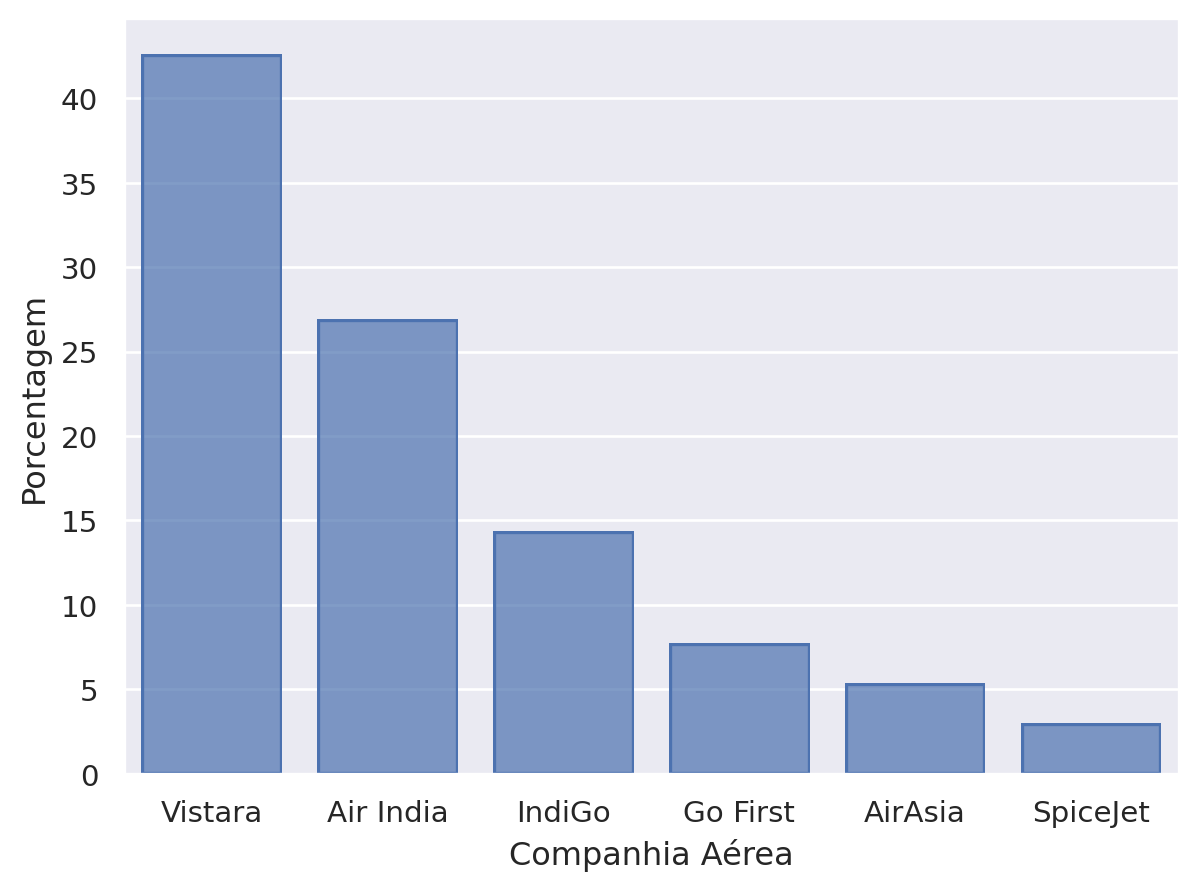

In [ ]:
(
    so.Plot(df, x='Companhia Aérea')
    .add(so.Bar(), so.Hist(stat='percent'))
    .scale(x=so.Nominal(order=df['Companhia Aérea'].value_counts().index))
    .label(y='Porcentagem')
)

In [ ]:
# Lista para ordenar as companhias aéreas do maior para o menor preço de passagem médio
price_order = (df.groupby('Companhia Aérea')['Preço (Rúpia Indiana)'].mean().sort_values(ascending=False)).index.tolist()

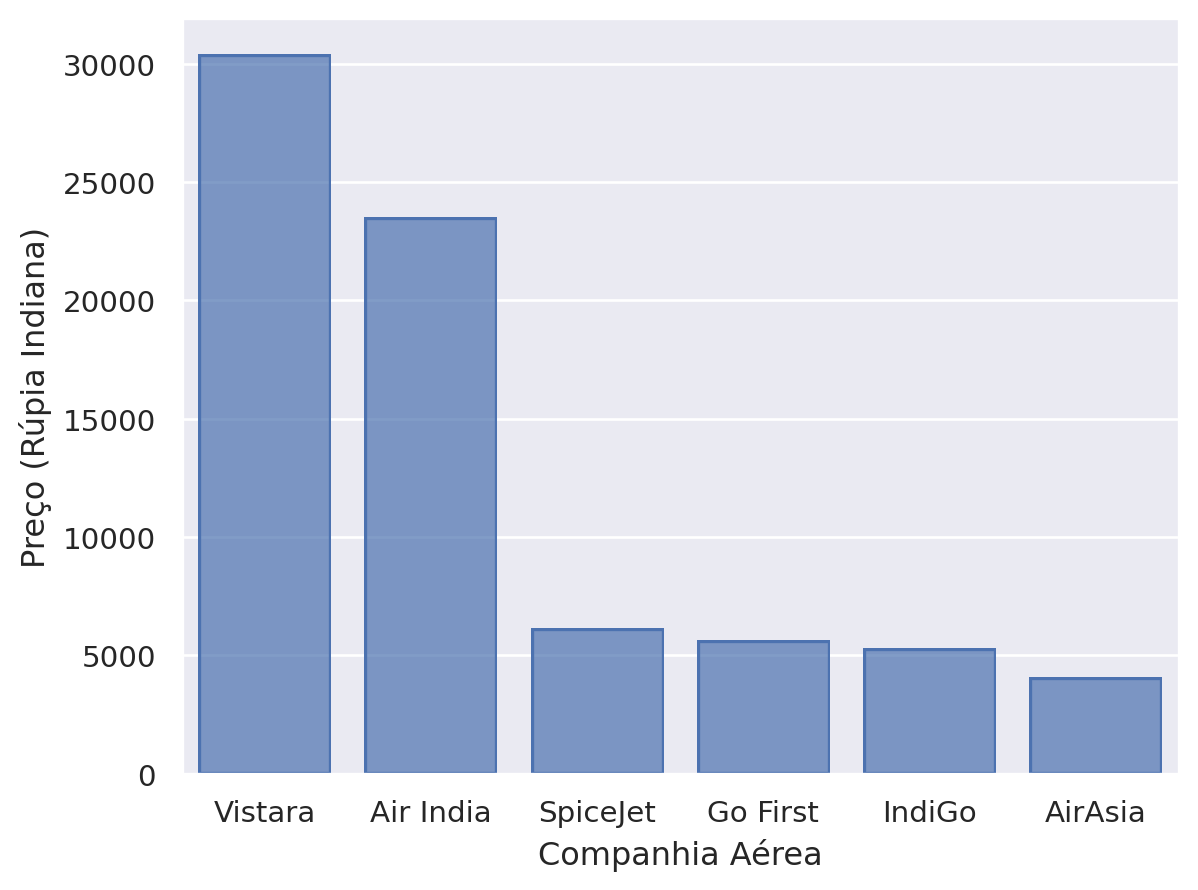

In [ ]:
(
    so.Plot(df, x='Companhia Aérea', y='Preço (Rúpia Indiana)')
    .add(so.Bar(), so.Agg('mean'))
    .scale(x=so.Nominal(order=price_order))
)

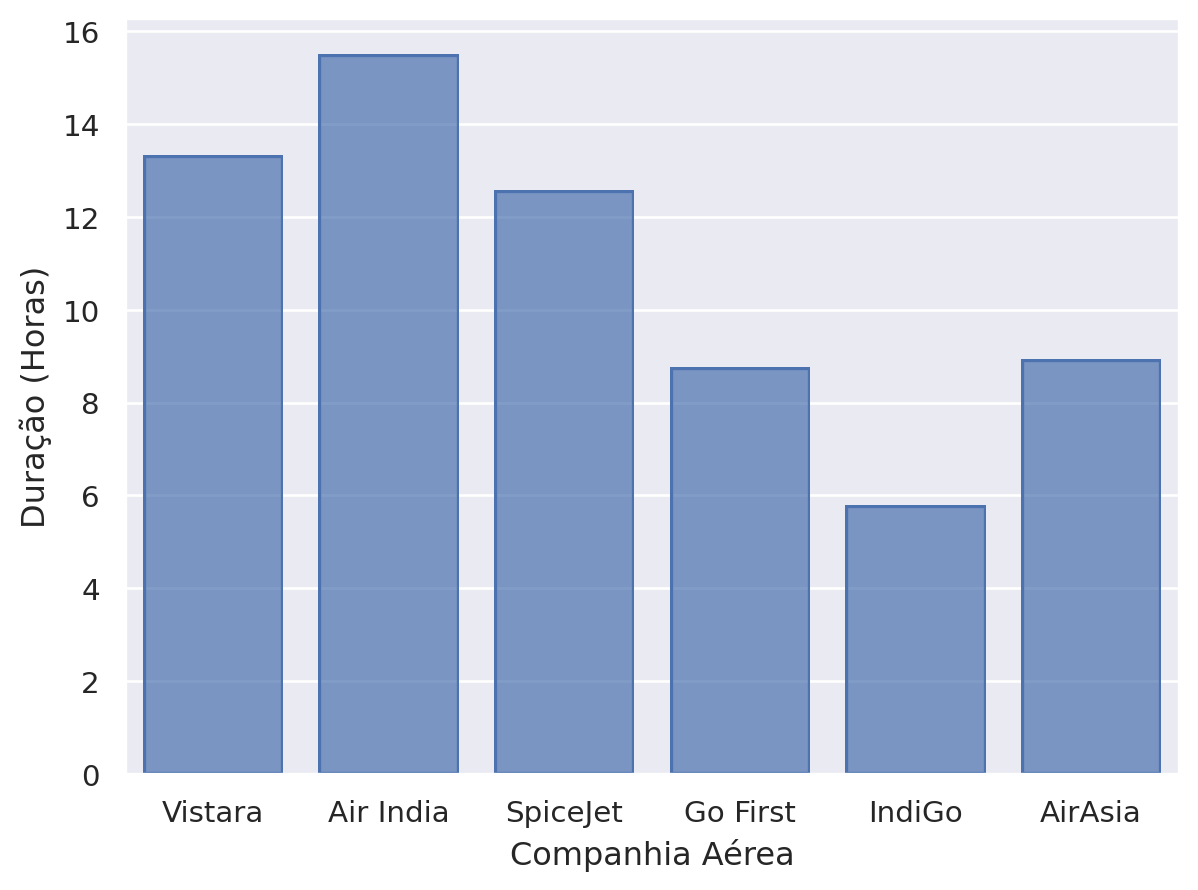

In [ ]:
(
    so.Plot(df, x='Companhia Aérea', y='Duração (Horas)')
    .add(so.Bar(), so.Agg())
    .scale(x=so.Nominal(order=price_order))
)

In [ ]:
# dataset temporário criado para normalizar o gráfico de barras
n = df.groupby(['Companhia Aérea', 'Classe']).size().reset_index(name='n')
n_total = n.groupby('Companhia Aérea')['n'].sum().reset_index(name='total')
n = n.merge(n_total, on='Companhia Aérea')
n['Porcentagem'] = (n['n'] / n['total']) * 100


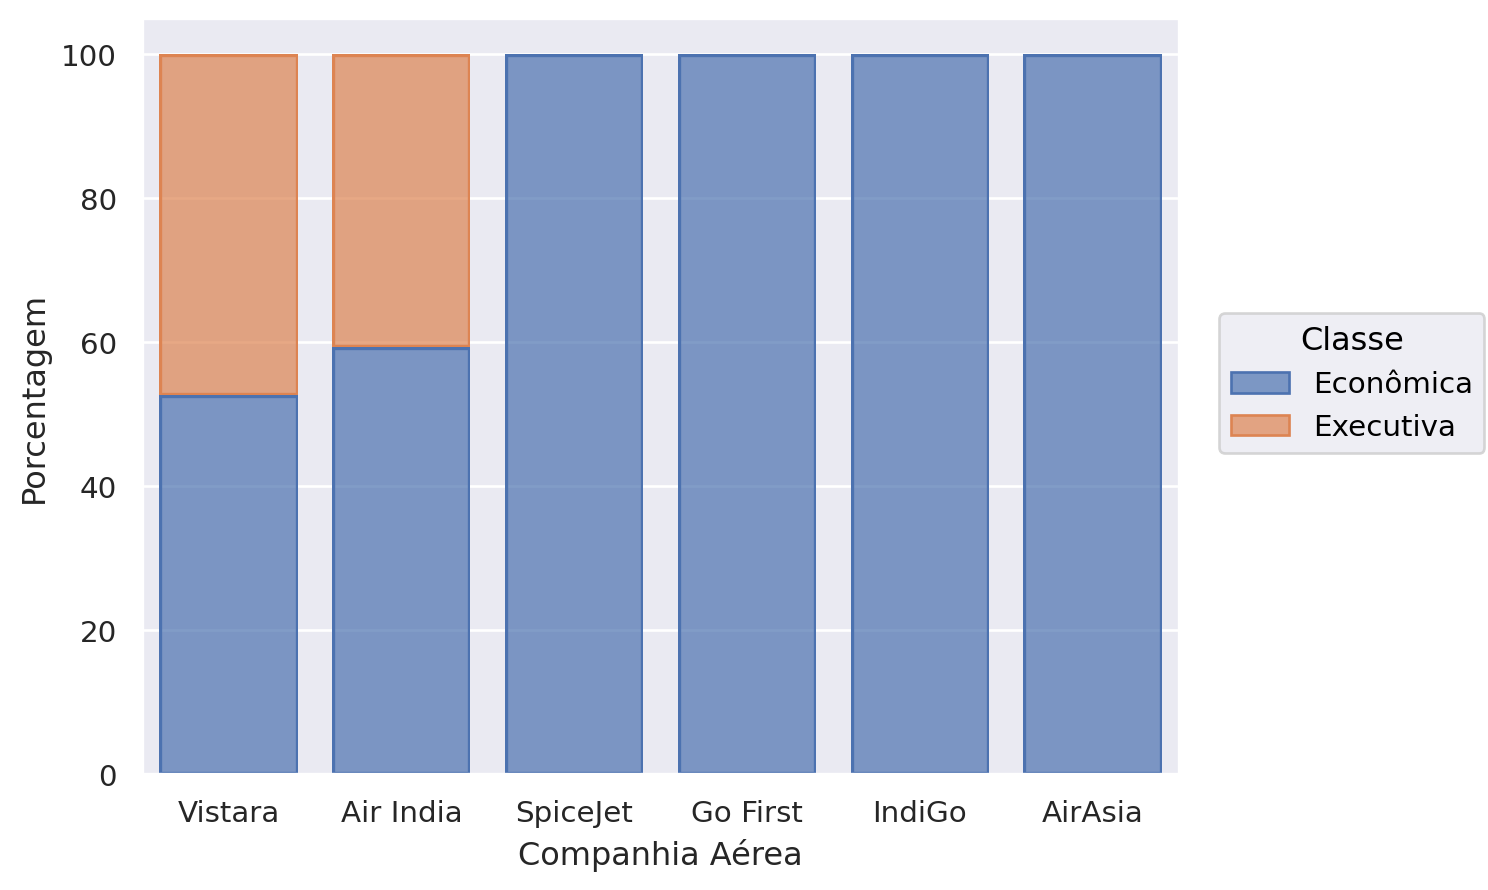

In [ ]:
(
    so.Plot(n, x='Companhia Aérea', y='Porcentagem', color='Classe')
    .add(so.Bar(), so.Stack())
    .scale(x=so.Nominal(order=price_order))
)

In [ ]:
# dataset temporário para organizar os dados em intervalos de dias
df_agg = df.groupby(pd.cut(df['Antecedência da Reserva (Dias)'], bins=[1, 9, 17, 25, 33, 41, 49]))['Preço (Rúpia Indiana)'].mean().reset_index()

<ipython-input-14-89a48c9d48e7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(pd.cut(df['Antecedência da Reserva (Dias)'], bins=[1, 9, 17, 25, 33, 41, 49]))['Preço (Rúpia Indiana)'].mean().reset_index()


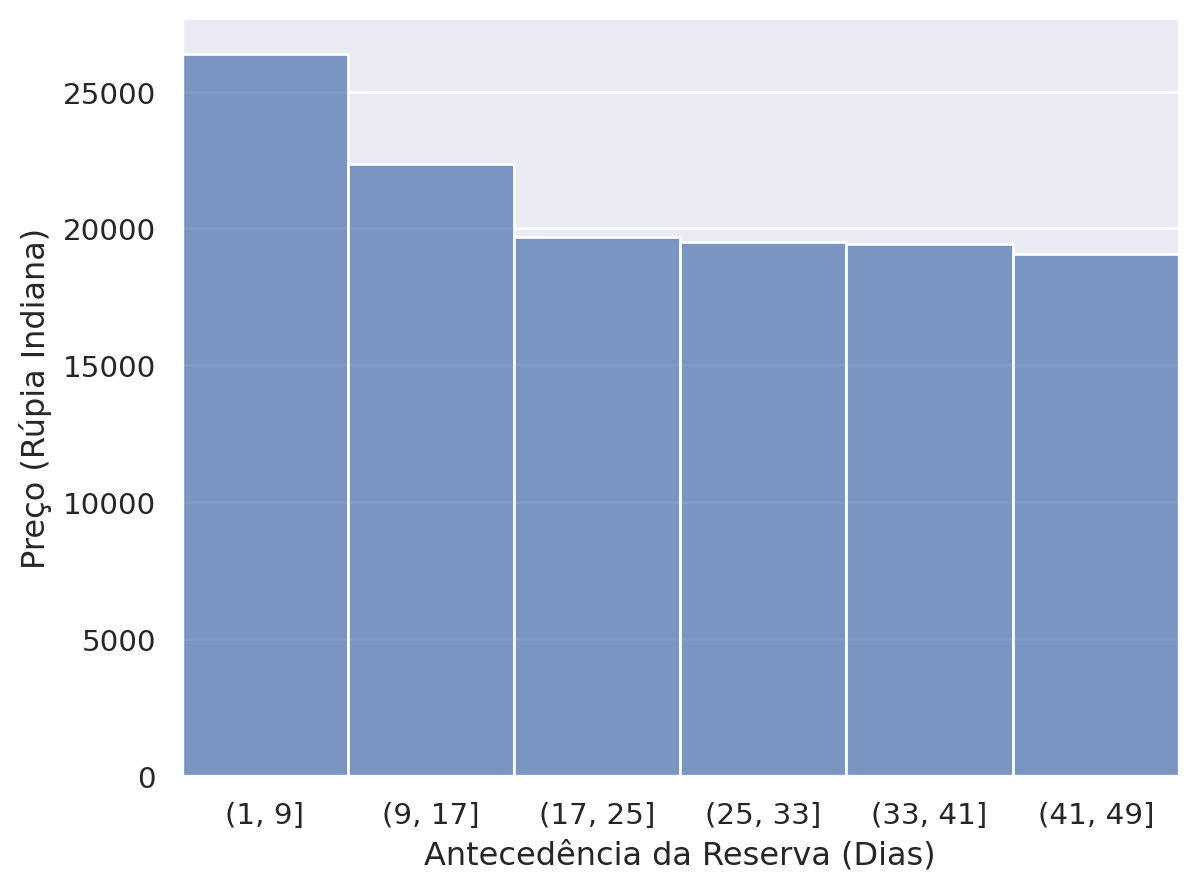

In [ ]:
(
    so.Plot(df_agg, x='Antecedência da Reserva (Dias)', y='Preço (Rúpia Indiana)') # x='Antecedência da Reserva (Dias)'
    .add(so.Bars())
)

In [ ]:
# transformando os horários em variáveis categórias para serem representados na ordem correta
ordem_horarios = ['0h~3h', '3h~6h', '6h~12h', '12h~18h', '18h~21h', '21h~0h']

df['Horário de Partida'] = pd.Categorical(df['Horário de Partida'],
                                          categories=ordem_horarios,
                                          ordered=True)

df['Horário de Chegada'] = pd.Categorical(df['Horário de Chegada'],
                                          categories=ordem_horarios,
                                          ordered=True)

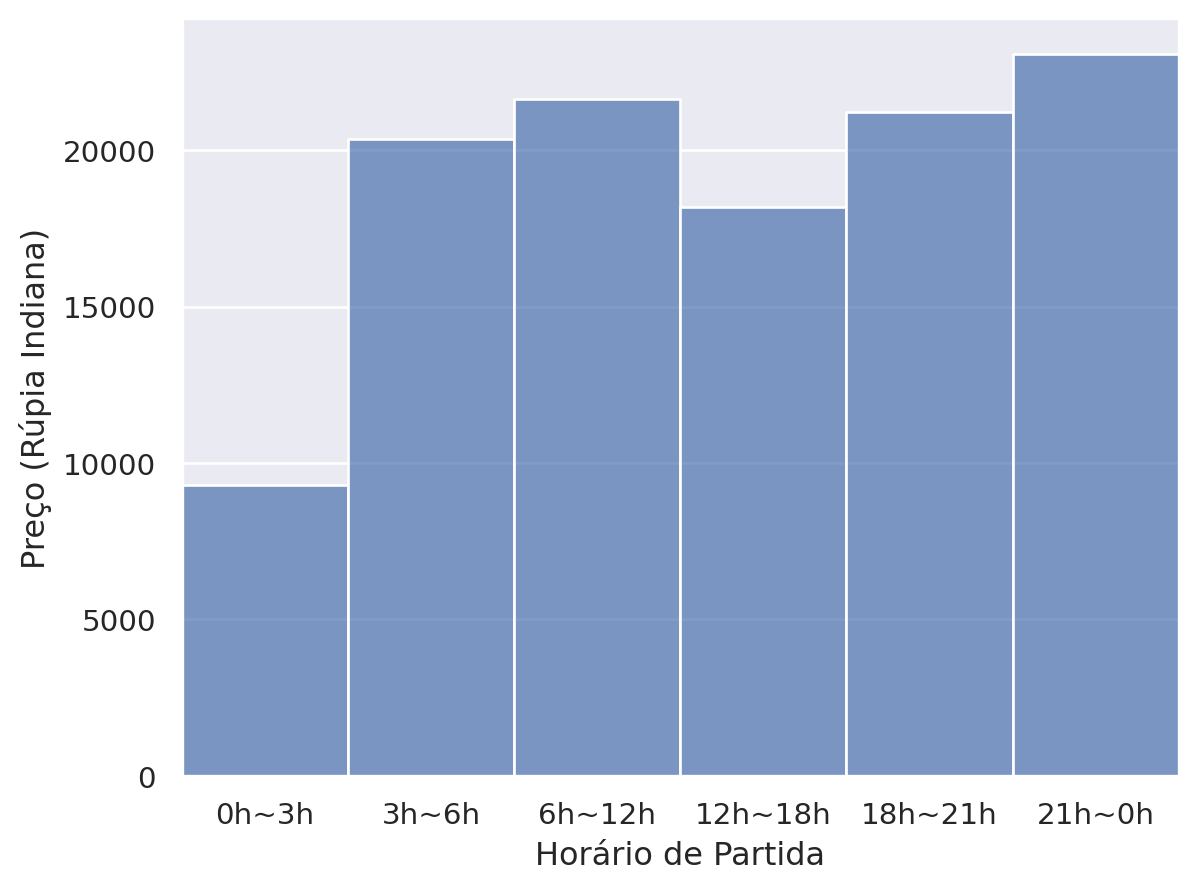

In [ ]:
(
    so.Plot(df, x='Horário de Partida', y='Preço (Rúpia Indiana)')
    .add(so.Bars(), so.Agg())
)

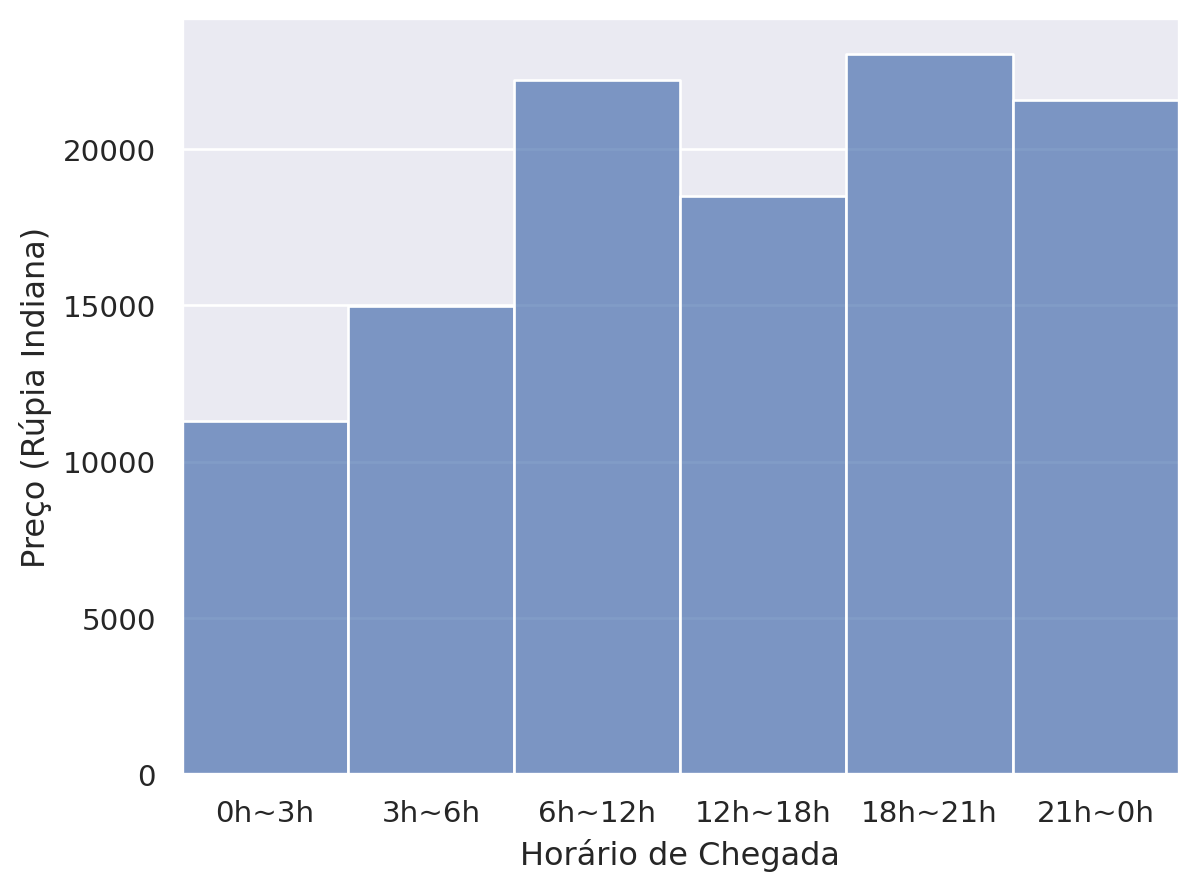

In [ ]:
(
    so.Plot(df, x='Horário de Chegada', y='Preço (Rúpia Indiana)')
    .add(so.Bars(), so.Agg())
)

In [ ]:
df_executiva = df[df['Classe'] == 'Executiva']

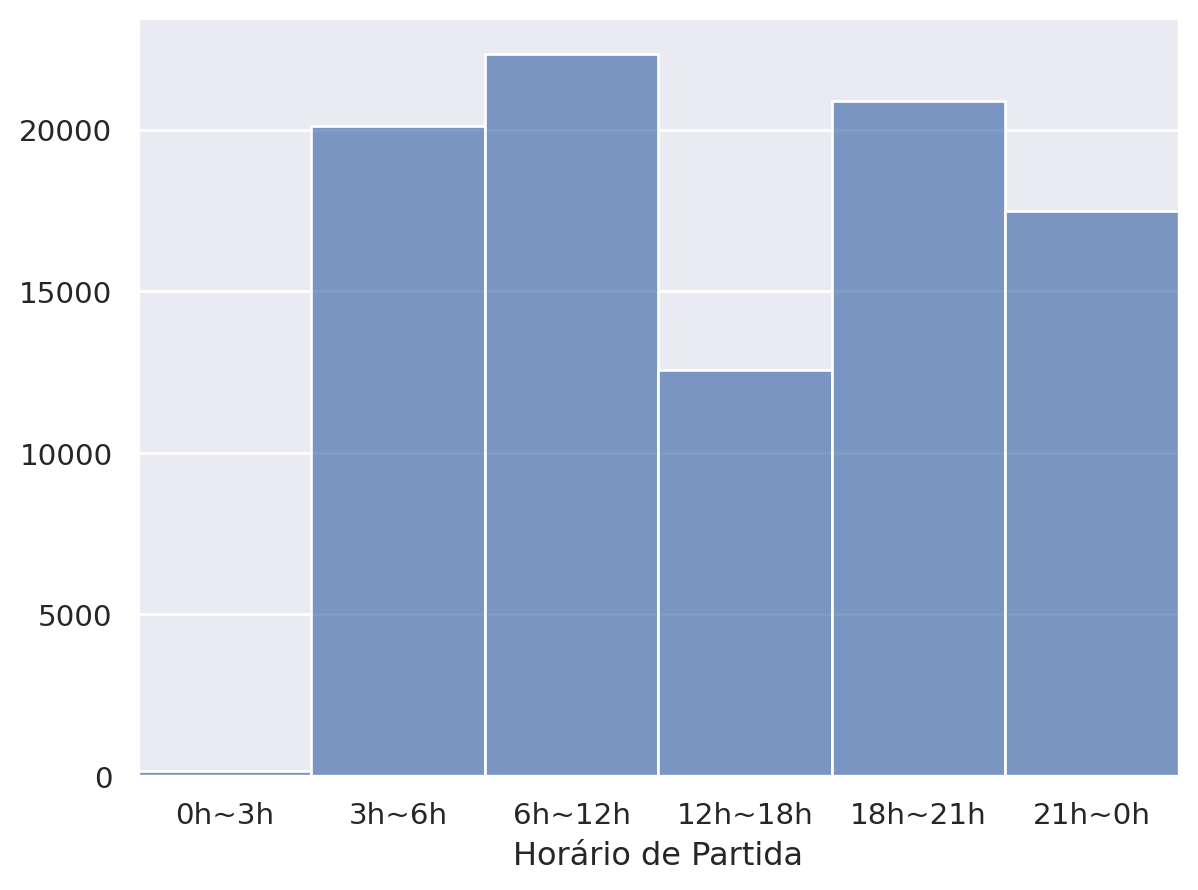

In [ ]:
(
    so.Plot(df_executiva, x='Horário de Partida')
    .add(so.Bars(), so.Hist())
)

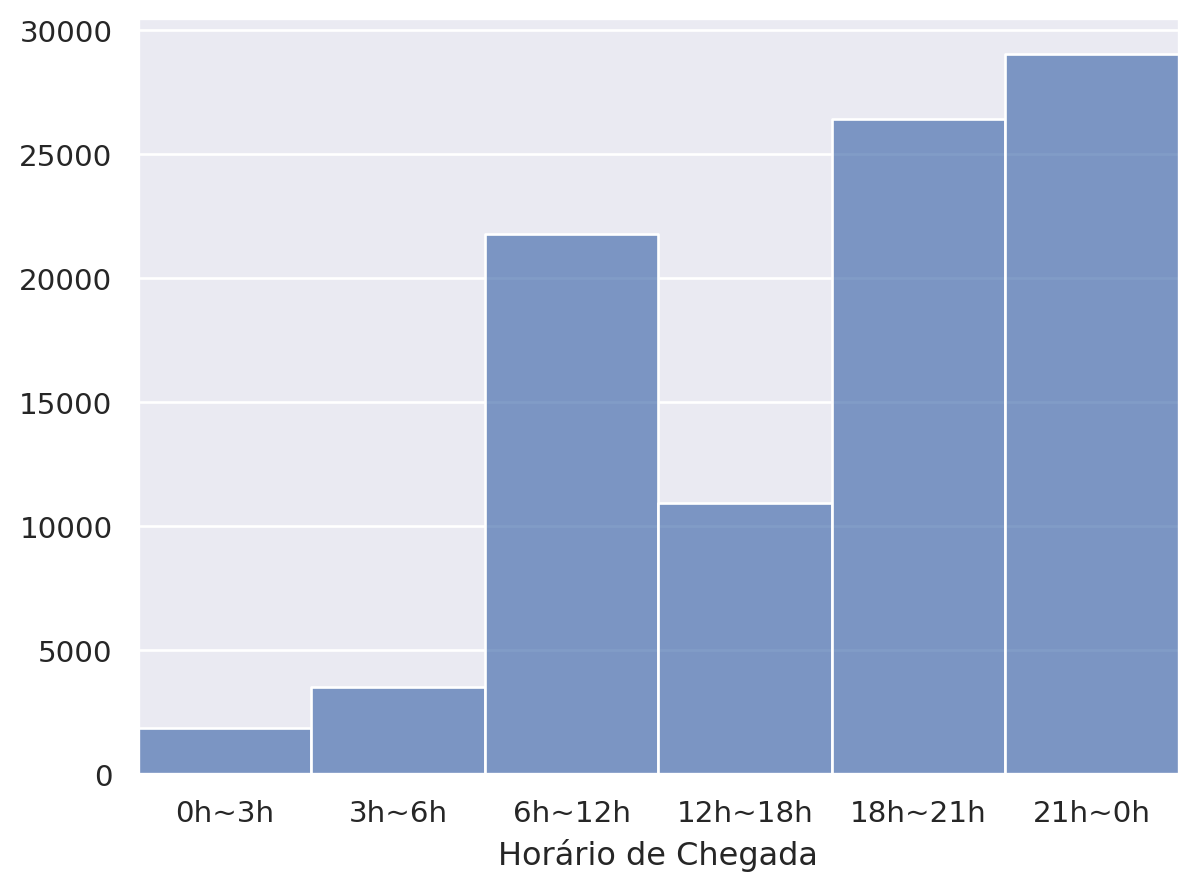

In [ ]:
(
    so.Plot(df_executiva, x='Horário de Chegada')
    .add(so.Bars(), so.Hist())
)

In [ ]:
df_economica = df[df['Classe'] == 'Econômica']

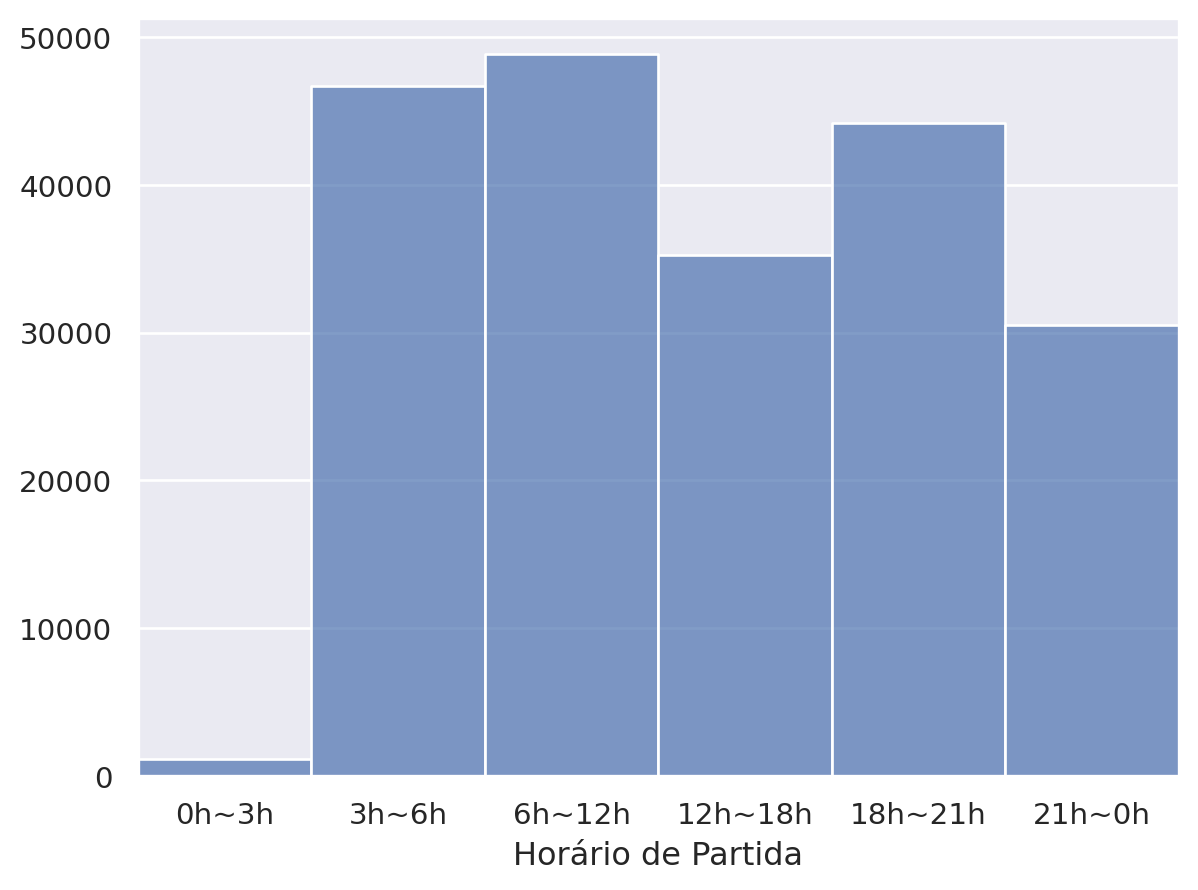

In [ ]:
(
    so.Plot(df_economica, x='Horário de Partida')
    .add(so.Bars(), so.Hist())
)

In [ ]:
sns.set_theme()

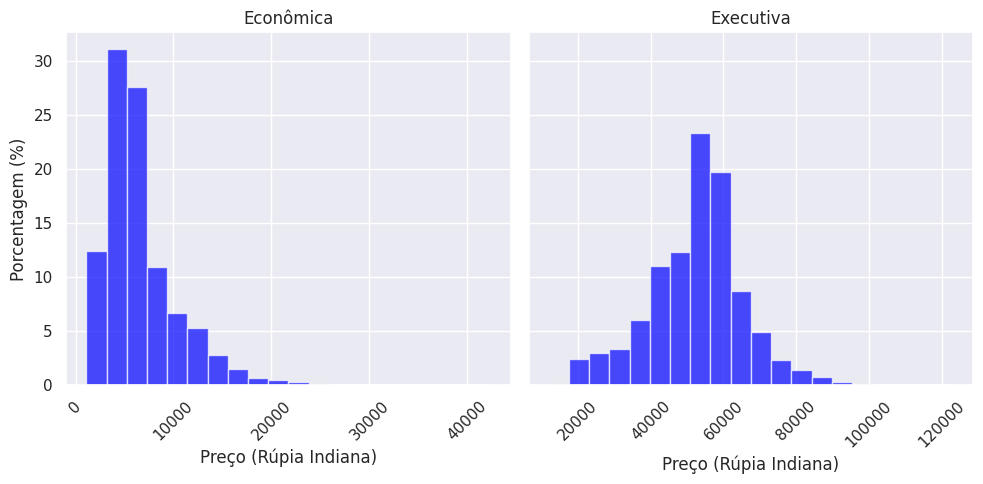

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for i, (classe, ax) in enumerate(zip(['Econômica', 'Executiva'], axes)):
    subset = df[df['Classe'] == classe]

    counts, bins, _ = ax.hist(
        subset['Preço (Rúpia Indiana)'],
        bins=20,
        weights=np.ones(len(subset)) / len(subset) * 100,
        color='blue',
        alpha=0.7
    )

    ax.set_title(classe)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Preço (Rúpia Indiana)')
    if i == 0:
        ax.set_ylabel('Porcentagem (%)')

plt.tight_layout()
plt.show()

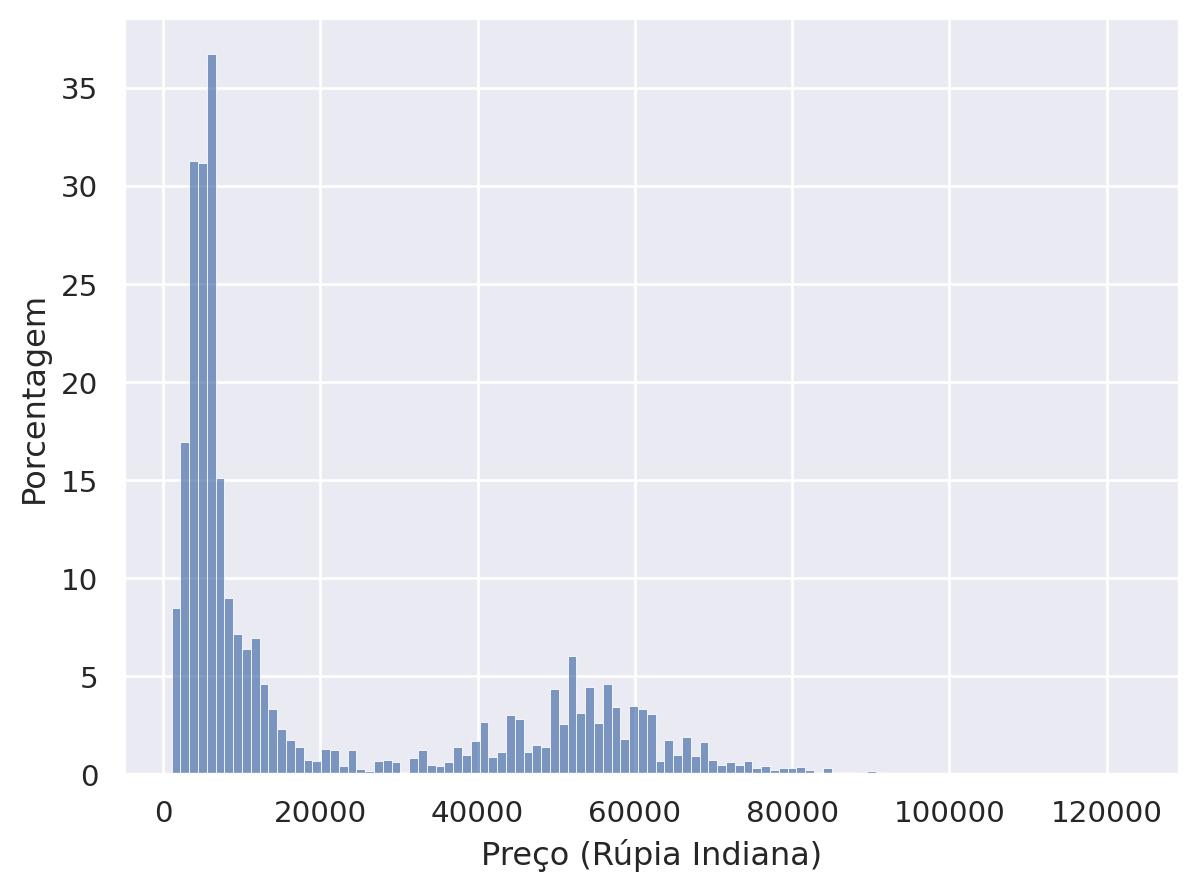

In [ ]:
(
    so.Plot(df, x='Preço (Rúpia Indiana)')
    .add(so.Bars(), so.Hist(stat='frequency'))
    .label(y='Porcentagem')
)

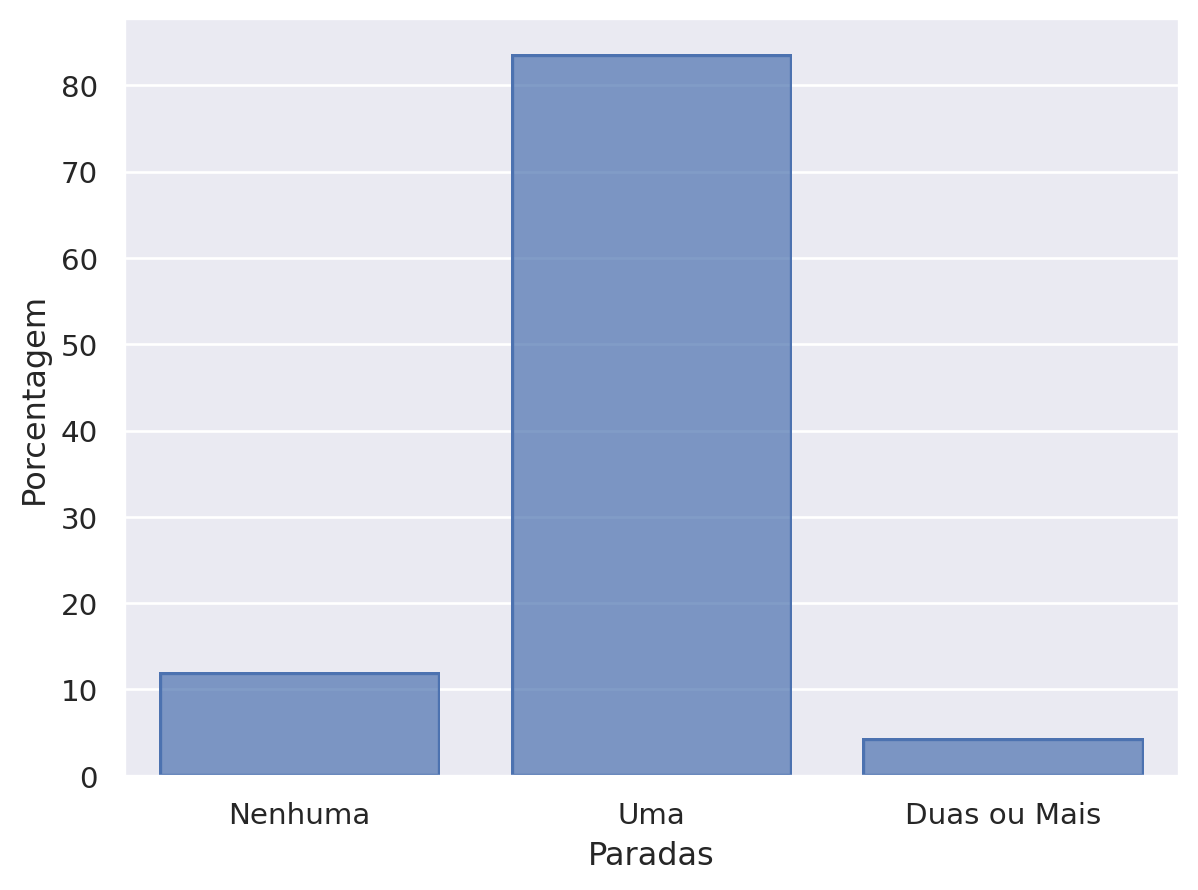

In [ ]:
(
    so.Plot(df, x='Paradas')
    .add(so.Bar(), so.Hist(stat='percent'))
    .label(y='Porcentagem')
)

In [ ]:
n = df.groupby(['Companhia Aérea', 'Paradas']).size().reset_index(name='n')
n_total = n.groupby('Companhia Aérea')['n'].sum().reset_index(name='total')
n = n.merge(n_total, on='Companhia Aérea')
n['Porcentagem'] = (n['n'] / n['total']) * 100

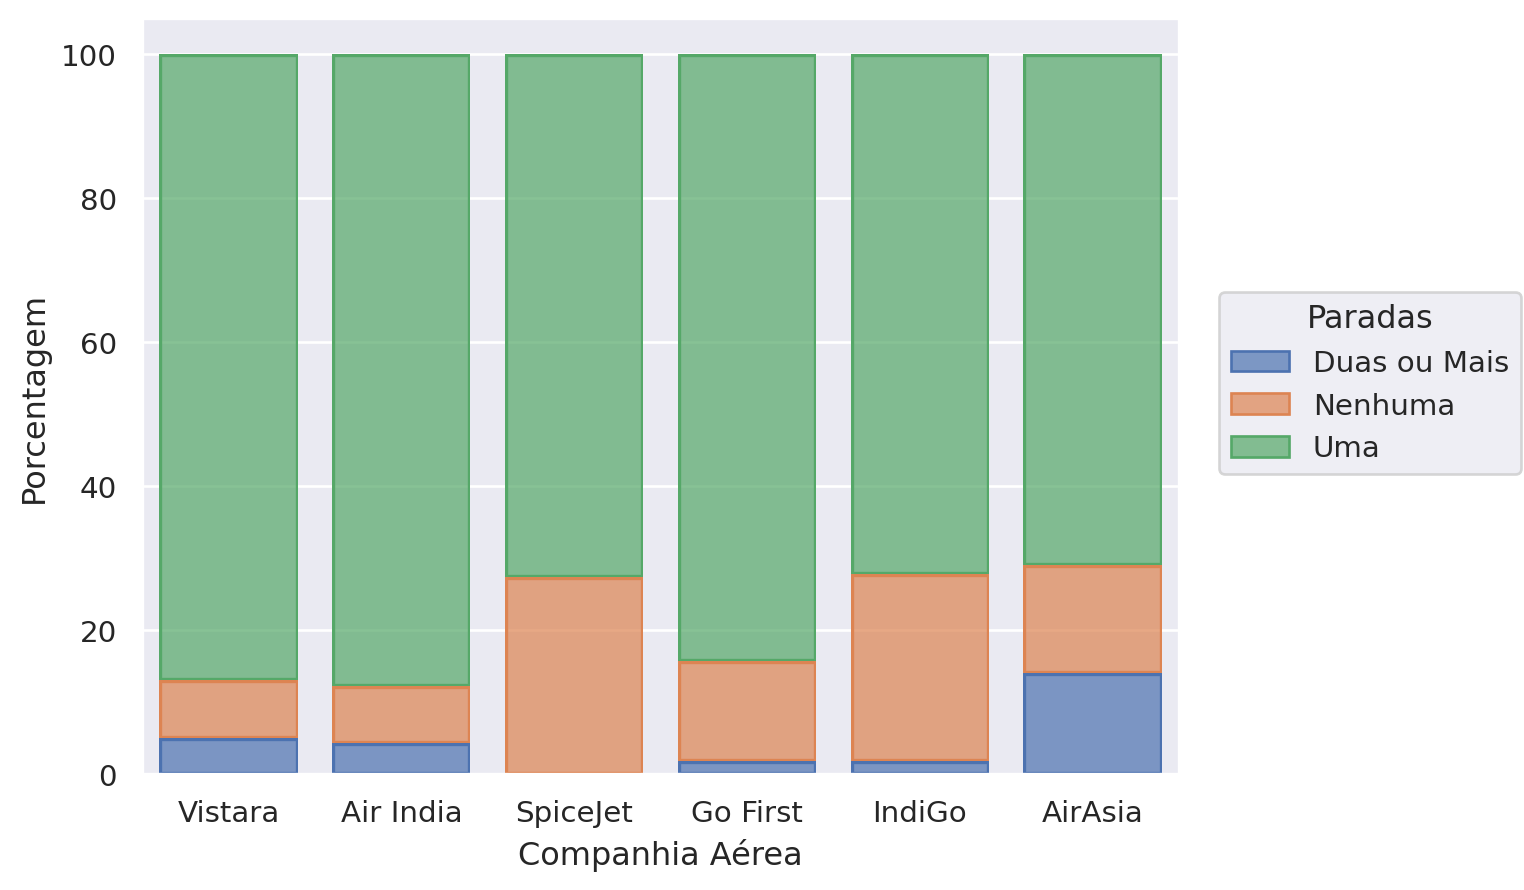

In [ ]:
(
    so.Plot(n, x='Companhia Aérea', y='Porcentagem', color='Paradas')
    .add(so.Bar(), so.Stack())
    .scale(x=so.Nominal(order=price_order))
)

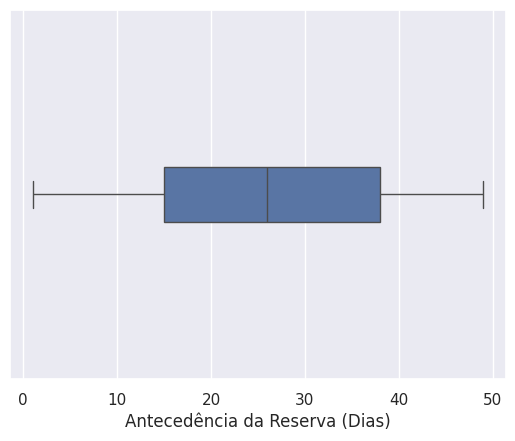

In [ ]:
sns.boxplot(df, x='Antecedência da Reserva (Dias)', width = 0.15)
plt.show()

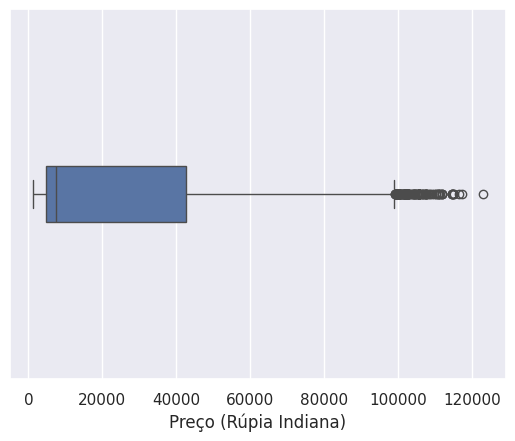

In [ ]:
sns.boxplot(df, x='Preço (Rúpia Indiana)', width = 0.15)
plt.show()